In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [145]:
weather = pd.read_csv('./Data/data_per_lokasi/data_fix_temp_96001.csv')

In [146]:
weather

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
0,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.00000,0.0,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
1,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.00000,0.0,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
2,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.00000,0.0,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
3,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.00000,0.0,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
4,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.00000,0.0,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,2023-04-12 21:00:00,96001,0.000181,2.521340e-10,0,27.5648,25.4250,88.2517,5.47214,229.0580,0.758010,0.00000,0.0,100561.0,0.0,0.019365,291.085,498.532,402.179,2280.46000,0.0,23.2769,89.6105,6.58782,227.9400,15.7091,59.9932,2.513150,97.9713,-3.94266,18.1874,5.23077,37.2362,1,12,5.87655,95.33785,126,26.9
3471,2023-04-13 00:00:00,96001,0.669621,0.000000e+00,0,26.9044,25.2219,90.6400,5.55761,245.6290,0.914715,0.00000,0.0,100706.0,0.0,0.019147,292.135,417.006,317.544,1940.44000,0.0,22.9121,91.4402,6.25795,239.5850,15.5944,63.2563,2.907670,111.7730,-3.95491,21.7449,5.51392,50.4795,1,12,5.87655,95.33785,126,27.0
3472,2023-04-13 15:00:00,96001,0.110796,0.000000e+00,0,28.6063,24.9508,80.7394,2.86711,300.4140,0.725273,0.02629,0.0,100844.0,0.0,0.018772,288.972,638.925,602.875,1987.67000,0.0,23.8241,92.3019,3.09350,296.3800,15.9221,73.6574,3.092390,70.9362,-4.25857,16.9670,4.96094,73.0856,0,12,5.87655,95.33785,126,27.6
3473,2023-04-13 18:00:00,96001,0.191773,0.000000e+00,0,27.9298,25.0292,84.3782,2.46416,269.6540,0.724071,0.00000,0.0,100652.0,0.0,0.019165,292.235,560.271,476.188,2135.41000,0.0,23.5207,92.9800,3.04130,273.1350,16.0441,69.1527,1.540230,67.7536,-3.84476,10.2077,5.59534,79.9776,0,12,5.87655,95.33785,126,27.1


In [147]:
weather.apply(pd.isnull).sum()/weather.shape[0]

Date            0.0
lokasi          0.0
con_prec.mm.    0.0
mic_prec.mm.    0.0
sha_prec.mm.    0.0
suhu2m.degC.    0.0
dew2m.degC.     0.0
rh2m...         0.0
wspeed.m.s.     0.0
wdir.deg.       0.0
lcloud...       0.0
mcloud...       0.0
hcloud...       0.0
surpre.Pa.      0.0
clmix.kg.kg.    0.0
wamix.kg.kg.    0.0
outlr.W.m2.     0.0
pblh.m.         0.0
lifcl.m.        0.0
cape.j.kg.      0.0
mdbz            0.0
t950.degC.      0.0
rh950...        0.0
ws950.m.s.      0.0
wd950.deg.      0.0
t800.degC.      0.0
rh800...        0.0
ws800.m.s.      0.0
wd800.deg.      0.0
t500.degC.      0.0
rh500...        0.0
ws500.m.s.      0.0
wd500.deg.      0.0
hari            0.0
UTC             0.0
LAT             0.0
LON             0.0
ELEV            0.0
t_obs           0.0
dtype: float64

In [148]:
weather['lokasi'].unique()

array([96001], dtype=int64)

In [149]:
print('Correlation Matrix')
pd.set_option('display.max_columns', None)
weather.corr()

Correlation Matrix


C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\3170244955.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
lokasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
con_prec.mm.,NaN,1.000000,0.123012,NaN,-0.430825,0.121491,0.453325,-0.026267,-0.063331,0.352248,0.244159,0.188745,-0.010012,0.170522,0.192751,-0.376558,-0.225168,-0.409780,0.018145,0.248474,-0.307454,0.308127,-0.008132,-0.058308,-0.289980,0.308052,-0.001816,-0.090050,0.073350,0.179387,0.069866,-0.047048,0.060174,NaN,NaN,NaN,NaN,-0.186374
mic_prec.mm.,NaN,0.123012,1.000000,NaN,-0.096445,0.001280,0.082565,0.029933,-0.036097,0.052702,0.062569,0.063109,0.000457,-0.001478,0.006826,-0.087571,-0.039510,-0.068713,-0.039226,0.106878,-0.072612,0.035549,0.029109,-0.035306,-0.051944,0.053840,0.019618,0.023622,0.020805,0.049755,0.036986,0.028607,-0.004946,NaN,NaN,NaN,NaN,-0.052842
sha_prec.mm.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suhu2m.degC.,NaN,-0.430825,-0.096445,NaN,1.000000,0.172234,-0.682120,0.100766,0.249224,-0.574741,-0.351555,-0.186614,-0.190364,-0.078232,0.001164,0.296313,0.349234,0.663969,0.231197,-0.251681,0.844968,-0.453624,0.094429,0.251343,0.675299,-0.404318,0.153266,0.186027,0.044207,-0.117108,-0.115387,0.130621,-0.167206,NaN,NaN,NaN,NaN,0.448552
dew2m.degC.,NaN,0.121491,0.001280,NaN,0.172234,1.000000,0.601829,0.244747,0.259674,0.226697,0.050093,0.038573,-0.301610,0.005319,0.947881,-0.067917,-0.397215,-0.529637,0.846568,-0.040463,0.356839,0.270917,0.246518,0.245063,0.222923,0.225202,0.285616,0.068047,0.150538,0.191951,-0.065440,0.100489,0.044308,NaN,NaN,NaN,NaN,0.167101
rh2m...,NaN,0.453325,0.082565,NaN,-0.682120,0.601829,1.000000,0.101104,-0.010263,0.634389,0.324079,0.181415,-0.071828,0.070646,0.700986,-0.295533,-0.580683,-0.928328,0.438278,0.177895,-0.415239,0.564194,0.108447,-0.022588,-0.381938,0.497752,0.089035,-0.101752,0.079060,0.239803,0.047310,-0.032427,0.170677,NaN,NaN,NaN,NaN,-0.239447
wspeed.m.s.,NaN,-0.026267,0.029933,NaN,0.100766,0.244747,0.101104,1.000000,0.152664,-0.175674,0.056381,0.089907,-0.112601,0.007939,-0.000191,-0.003297,0.073738,0.053828,-0.061917,0.053983,0.061283,-0.120059,0.974811,0.157551,0.120131,-0.116515,0.640482,0.301136,0.012659,0.083725,-0.066673,0.263498,0.025967,NaN,NaN,NaN,NaN,0.157412
wdir.deg.,NaN,-0.063331,-0.036097,NaN,0.249224,0.259674,-0.010263,0.152664,1.000000,-0.242481,0.121963,0.196989,-0.202855,-0.035621,0.199551,-0.115187,-0.096026,0.046509,0.135240,-0.037609,0.332096,-0.177908,0.167776,0.950551,0.144929,0.028558,0.152176,0.545828,0.043044,0.293165,-0.142609,0.219068,-0.054218,NaN,NaN,NaN,NaN,0.156636
lcloud...,NaN,0.352248,0.052702,NaN,-0.574741,0.226697,0.634389,-0.175674,-0.242481,1.000000,0.102985,-0.061272,0.090481,0.054947,0.379607,-0.135002,-0.110861,-0.662202,0.240679,0.076470,-0.635821,0.864941,-0.188507,-0.245649,-0.386953,0.374469,-0.129796,-0.285537,0.086998,-0.067716,0.077514,-0.158887,0.164928,NaN,NaN,NaN,NaN,-0.306752


In [150]:
df_wmoid = pd.read_excel('./Data/daftar_wmoid.xlsx')
df_wmoid

,WMOID,Nama UPT,Provinsi,Kab/Kota,Lintang,Bujur,Elevasi (m),Catatan
0,96001,Stasiun Meteorologi Maimun Saleh,Aceh,Sabang,5.8766,95.3379,126,Nama awal Stamet Cut Bau Sabang
1,96009,Stasiun Meteorologi Malikussaleh,Aceh,Aceh Utara,5.2287,96.9475,31,Nama awal Stamet Malikussaleh - Lhokseumawe
2,96011,Stasiun Meteorologi Sultan Iskandar Muda,Aceh,Banda Aceh,5.5224,95.417,21,Nama Awal Stamet Blangbintang - Banda Aceh
3,96013,Stasiun Geofisika Aceh Besar,Aceh,Aceh Besar,5.496,95.296,7,Sebelumnya bernama Stageof Mata Ie Banda Aceh
4,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,Aceh,Nagan Raya,4.0493,96.248,6,Nama awal Stamet Tjut Njak Dien - Meulaboh
...,...,...,...,...,...,...,...,...
180,97876,Stasiun Meteorologi Tanah Merah,Papua,Boven Digul,-6.1,140.31,28,-
181,97900,Stasiun Meteorologi Mathilda Batlayeri,Maluku,Kepulauan Tanimbar (Pemekaran Maluku Tenggar...,-7.98,131.3,24,Nama awal Stamet Olilit Saumlaki
182,97978,Stasiun Klimatologi Merauke,Papua,Merauke,-8.387,140.517,6,Sebelumnya bernama Staklim Tanah Miring
183,97980,Stasiun Meteorologi Mopah,Papua,Merauke,-8.5202,140.4157,3,Nama awal Stamet Mopah Merauke


In [151]:
df_wmoid_filtered = df_wmoid[['WMOID', 'Nama UPT']]
df_wmoid_filtered.rename(columns={'WMOID' : 'lokasi'}, inplace=True)
df_wmoid_filtered

C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\542943972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wmoid_filtered.rename(columns={'WMOID' : 'lokasi'}, inplace=True)


,lokasi,Nama UPT
0,96001,Stasiun Meteorologi Maimun Saleh
1,96009,Stasiun Meteorologi Malikussaleh
2,96011,Stasiun Meteorologi Sultan Iskandar Muda
3,96013,Stasiun Geofisika Aceh Besar
4,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya
...,...,...
180,97876,Stasiun Meteorologi Tanah Merah
181,97900,Stasiun Meteorologi Mathilda Batlayeri
182,97978,Stasiun Klimatologi Merauke
183,97980,Stasiun Meteorologi Mopah


In [152]:
weather_processed = weather

weather_processed = weather_processed.merge(df_wmoid_filtered, on='lokasi')

weather_processed

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
0,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.00000,0.0,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
1,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.00000,0.0,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,Stasiun Meteorologi Maimun Saleh
2,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.00000,0.0,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,Stasiun Meteorologi Maimun Saleh
3,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.00000,0.0,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,Stasiun Meteorologi Maimun Saleh
4,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.00000,0.0,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,Stasiun Meteorologi Maimun Saleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,2023-04-12 21:00:00,96001,0.000181,2.521340e-10,0,27.5648,25.4250,88.2517,5.47214,229.0580,0.758010,0.00000,0.0,100561.0,0.0,0.019365,291.085,498.532,402.179,2280.46000,0.0,23.2769,89.6105,6.58782,227.9400,15.7091,59.9932,2.513150,97.9713,-3.94266,18.1874,5.23077,37.2362,1,12,5.87655,95.33785,126,26.9,Stasiun Meteorologi Maimun Saleh
3471,2023-04-13 00:00:00,96001,0.669621,0.000000e+00,0,26.9044,25.2219,90.6400,5.55761,245.6290,0.914715,0.00000,0.0,100706.0,0.0,0.019147,292.135,417.006,317.544,1940.44000,0.0,22.9121,91.4402,6.25795,239.5850,15.5944,63.2563,2.907670,111.7730,-3.95491,21.7449,5.51392,50.4795,1,12,5.87655,95.33785,126,27.0,Stasiun Meteorologi Maimun Saleh
3472,2023-04-13 15:00:00,96001,0.110796,0.000000e+00,0,28.6063,24.9508,80.7394,2.86711,300.4140,0.725273,0.02629,0.0,100844.0,0.0,0.018772,288.972,638.925,602.875,1987.67000,0.0,23.8241,92.3019,3.09350,296.3800,15.9221,73.6574,3.092390,70.9362,-4.25857,16.9670,4.96094,73.0856,0,12,5.87655,95.33785,126,27.6,Stasiun Meteorologi Maimun Saleh
3473,2023-04-13 18:00:00,96001,0.191773,0.000000e+00,0,27.9298,25.0292,84.3782,2.46416,269.6540,0.724071,0.00000,0.0,100652.0,0.0,0.019165,292.235,560.271,476.188,2135.41000,0.0,23.5207,92.9800,3.04130,273.1350,16.0441,69.1527,1.540230,67.7536,-3.84476,10.2077,5.59534,79.9776,0,12,5.87655,95.33785,126,27.1,Stasiun Meteorologi Maimun Saleh


In [153]:
weather_processed = weather_processed.set_index('Date')

In [154]:
weather_processed.index = pd.to_datetime(weather_processed.index)
weather_processed = weather_processed.sort_index()
weather_processed.index

DatetimeIndex(['2021-02-27 15:00:00', '2021-02-27 18:00:00',
               '2021-02-27 21:00:00', '2021-02-28 00:00:00',
               '2021-02-28 03:00:00', '2021-02-28 06:00:00',
               '2021-02-28 09:00:00', '2021-02-28 12:00:00',
               '2021-02-28 15:00:00', '2021-02-28 18:00:00',
               ...
               '2023-04-12 06:00:00', '2023-04-12 09:00:00',
               '2023-04-12 12:00:00', '2023-04-12 15:00:00',
               '2023-04-12 18:00:00', '2023-04-12 21:00:00',
               '2023-04-13 00:00:00', '2023-04-13 15:00:00',
               '2023-04-13 18:00:00', '2023-04-13 21:00:00'],
              dtype='datetime64[ns]', name='Date', length=3475, freq=None)

In [155]:
weather_processed

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.00000,0.0,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.00000,0.0,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,Stasiun Meteorologi Maimun Saleh
2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.00000,0.0,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,Stasiun Meteorologi Maimun Saleh
2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.00000,0.0,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,Stasiun Meteorologi Maimun Saleh
2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.00000,0.0,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,Stasiun Meteorologi Maimun Saleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 21:00:00,96001,0.000181,2.521340e-10,0,27.5648,25.4250,88.2517,5.47214,229.0580,0.758010,0.00000,0.0,100561.0,0.0,0.019365,291.085,498.532,402.179,2280.46000,0.0,23.2769,89.6105,6.58782,227.9400,15.7091,59.9932,2.513150,97.9713,-3.94266,18.1874,5.23077,37.2362,1,12,5.87655,95.33785,126,26.9,Stasiun Meteorologi Maimun Saleh
2023-04-13 00:00:00,96001,0.669621,0.000000e+00,0,26.9044,25.2219,90.6400,5.55761,245.6290,0.914715,0.00000,0.0,100706.0,0.0,0.019147,292.135,417.006,317.544,1940.44000,0.0,22.9121,91.4402,6.25795,239.5850,15.5944,63.2563,2.907670,111.7730,-3.95491,21.7449,5.51392,50.4795,1,12,5.87655,95.33785,126,27.0,Stasiun Meteorologi Maimun Saleh
2023-04-13 15:00:00,96001,0.110796,0.000000e+00,0,28.6063,24.9508,80.7394,2.86711,300.4140,0.725273,0.02629,0.0,100844.0,0.0,0.018772,288.972,638.925,602.875,1987.67000,0.0,23.8241,92.3019,3.09350,296.3800,15.9221,73.6574,3.092390,70.9362,-4.25857,16.9670,4.96094,73.0856,0,12,5.87655,95.33785,126,27.6,Stasiun Meteorologi Maimun Saleh


In [156]:
weather_processed.index.year.unique()

Int64Index([2021, 2022, 2023], dtype='int64', name='Date')

In [157]:
weather.columns

Index(['Date', 'lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.',
       'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.',
       'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.',
       'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.',
       'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.',
       't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.',
       'rh500...', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC', 'LAT', 'LON',
       'ELEV', 't_obs'],
      dtype='object')

C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\2064819703.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather[column], ax=axes[i])
c:\Users\Nycht\anaconda3\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\2064819703.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

KeyError: 'Nama UPT'

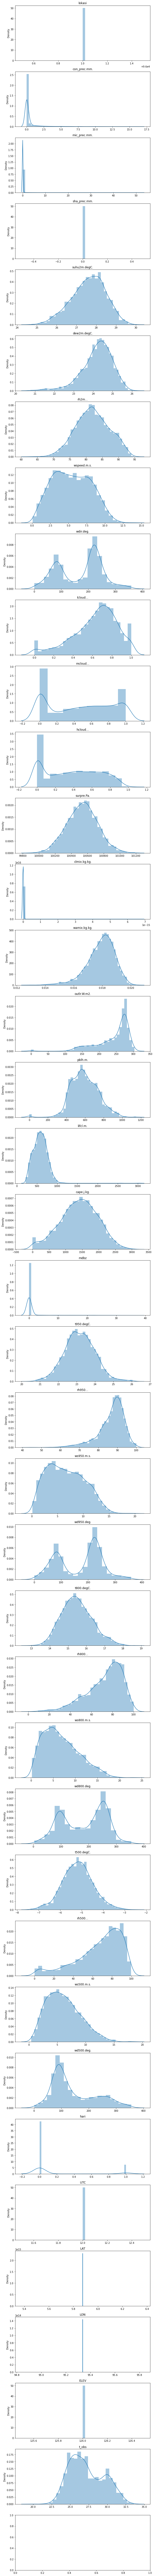

In [158]:
# Membuat subplot
fig, axes = plt.subplots(len(weather_processed.columns), 1, figsize=(10, 5 * len(weather_processed.columns)))

# Memplotkan setiap kolom menggunakan distplot
for i, column in enumerate(weather_processed.columns):
    sns.distplot(weather[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# f = plt.figure(figsize=(20,20))

# f.add_subplot(4,3,1)
# sns.countplot(y='con_prec.mm.', data = weather_processed)

# f.add_subplot(4,3,2)
# sns.countplot(y='mic_prec.mm.', data = weather_processed)

# f.add_subplot(4,3,3)
# sns.countplot(y='sha_prec.mm.	', data = weather_processed)

# f.add_subplot(4,3,4)
# sns.countplot(y='suhu2m.degC.	', data = weather_processed)

# f.add_subplot(4,3,5)
# sns.countplot(y='dew2m.degC.', data = weather_processed)

# f.add_subplot(4,3,6)
# sns.countplot(y='rh2m...', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='wspeed.m.s.', data = weather_processed)

# f.add_subplot(4,3,9)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,10)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

# f.add_subplot(4,3,8)
# sns.countplot(y='', data = weather_processed)

In [159]:
weather_processed.columns

Index(['lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.',
       'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.',
       'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.',
       'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.',
       'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.',
       't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.',
       'rh500...', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC', 'LAT', 'LON',
       'ELEV', 't_obs', 'Nama UPT'],
      dtype='object')

In [160]:
# suhu2m_maimun_saleh = weather_processed.loc[weather_processed['Nama UPT'] == 'Stasiun Meteorologi Maimun Saleh']
# suhu2m_maimun_saleh

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.00000,0.0,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.00000,0.0,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,Stasiun Meteorologi Maimun Saleh
2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.00000,0.0,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,Stasiun Meteorologi Maimun Saleh
2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.00000,0.0,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,Stasiun Meteorologi Maimun Saleh
2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.00000,0.0,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,Stasiun Meteorologi Maimun Saleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 21:00:00,96001,0.000181,2.521340e-10,0,27.5648,25.4250,88.2517,5.47214,229.0580,0.758010,0.00000,0.0,100561.0,0.0,0.019365,291.085,498.532,402.179,2280.46000,0.0,23.2769,89.6105,6.58782,227.9400,15.7091,59.9932,2.513150,97.9713,-3.94266,18.1874,5.23077,37.2362,1,12,5.87655,95.33785,126,26.9,Stasiun Meteorologi Maimun Saleh
2023-04-13 00:00:00,96001,0.669621,0.000000e+00,0,26.9044,25.2219,90.6400,5.55761,245.6290,0.914715,0.00000,0.0,100706.0,0.0,0.019147,292.135,417.006,317.544,1940.44000,0.0,22.9121,91.4402,6.25795,239.5850,15.5944,63.2563,2.907670,111.7730,-3.95491,21.7449,5.51392,50.4795,1,12,5.87655,95.33785,126,27.0,Stasiun Meteorologi Maimun Saleh
2023-04-13 15:00:00,96001,0.110796,0.000000e+00,0,28.6063,24.9508,80.7394,2.86711,300.4140,0.725273,0.02629,0.0,100844.0,0.0,0.018772,288.972,638.925,602.875,1987.67000,0.0,23.8241,92.3019,3.09350,296.3800,15.9221,73.6574,3.092390,70.9362,-4.25857,16.9670,4.96094,73.0856,0,12,5.87655,95.33785,126,27.6,Stasiun Meteorologi Maimun Saleh


<Axes: xlabel='Date'>

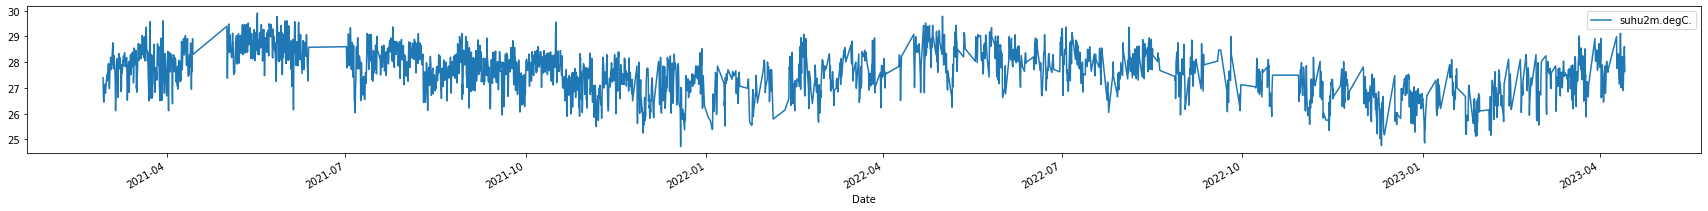

In [161]:
weather_processed[['suhu2m.degC.']].plot(figsize=(30,3))

In [162]:
weather_processed[['suhu2m.degC.','t_obs']]['2023-04-12']

C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\1967229565.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  weather_processed[['suhu2m.degC.','t_obs']]['2023-04-12']


,suhu2m.degC.,t_obs
Date,,
2023-04-12 00:00:00,27.0092,25.6
2023-04-12 03:00:00,27.4104,30.1
2023-04-12 06:00:00,28.0006,32.2
2023-04-12 09:00:00,28.2027,31.7
2023-04-12 12:00:00,28.2191,28.1
2023-04-12 15:00:00,28.1110,27.6
2023-04-12 18:00:00,27.6786,27.1
2023-04-12 21:00:00,27.5648,26.9


C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\4204025808.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  weather_processed[['suhu2m.degC.','t_obs']]['2023-04-12'].plot(figsize=(30,3), legend=True)


<Axes: xlabel='Date'>

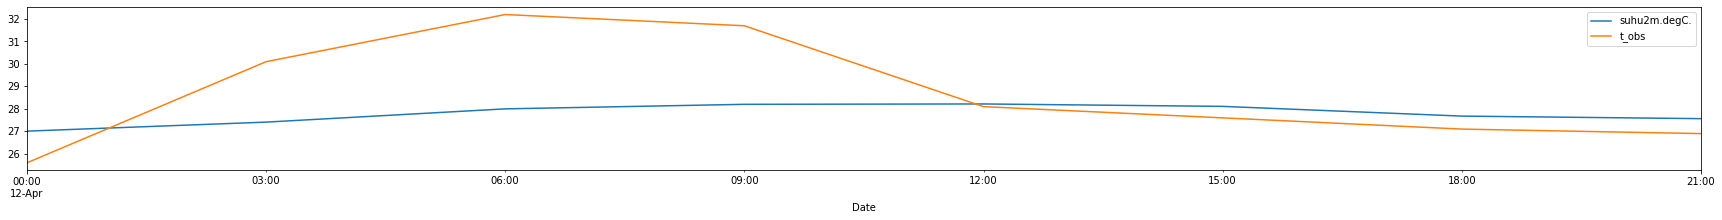

In [163]:
weather_processed[['suhu2m.degC.','t_obs']]['2023-04-12'].plot(figsize=(30,3), legend=True)

In [164]:
(weather_processed['sha_prec.mm.'] == 0).sum()/weather_processed.shape[0]

1.0

In [165]:
(weather_processed['clmix.kg.kg.'] == 0).sum()/weather_processed.shape[0]

0.998273381294964

In [166]:
(weather_processed['mdbz'] == 0).sum()/weather_processed.shape[0]

0.9234532374100719

In [167]:
(weather_processed['hari'] == 0).sum()/weather_processed.shape[0]

0.8492086330935252

In [168]:
weather_filtered = weather.drop(columns=['sha_prec.mm.', 'clmix.kg.kg.', 'mdbz', 'hari', 'UTC', 'LON', 'LAT'])
weather_filtered

,Date,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs
0,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.00000,0.0,100564.0,0.014986,299.737,770.659,908.410,38.57470,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,126,23.2
1,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.00000,0.0,100481.0,0.015089,299.999,769.073,847.329,21.24180,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,126,23.0
2,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.00000,0.0,100265.0,0.015313,297.695,743.406,772.599,23.78600,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,126,21.6
3,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.00000,0.0,100462.0,0.015351,297.548,735.940,742.773,14.16860,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,126,19.8
4,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.00000,0.0,100667.0,0.015026,297.792,729.502,809.919,2.12278,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,2023-04-12 21:00:00,96001,0.000181,2.521340e-10,27.5648,25.4250,88.2517,5.47214,229.0580,0.758010,0.00000,0.0,100561.0,0.019365,291.085,498.532,402.179,2280.46000,23.2769,89.6105,6.58782,227.9400,15.7091,59.9932,2.513150,97.9713,-3.94266,18.1874,5.23077,37.2362,126,26.9
3471,2023-04-13 00:00:00,96001,0.669621,0.000000e+00,26.9044,25.2219,90.6400,5.55761,245.6290,0.914715,0.00000,0.0,100706.0,0.019147,292.135,417.006,317.544,1940.44000,22.9121,91.4402,6.25795,239.5850,15.5944,63.2563,2.907670,111.7730,-3.95491,21.7449,5.51392,50.4795,126,27.0
3472,2023-04-13 15:00:00,96001,0.110796,0.000000e+00,28.6063,24.9508,80.7394,2.86711,300.4140,0.725273,0.02629,0.0,100844.0,0.018772,288.972,638.925,602.875,1987.67000,23.8241,92.3019,3.09350,296.3800,15.9221,73.6574,3.092390,70.9362,-4.25857,16.9670,4.96094,73.0856,126,27.6
3473,2023-04-13 18:00:00,96001,0.191773,0.000000e+00,27.9298,25.0292,84.3782,2.46416,269.6540,0.724071,0.00000,0.0,100652.0,0.019165,292.235,560.271,476.188,2135.41000,23.5207,92.9800,3.04130,273.1350,16.0441,69.1527,1.540230,67.7536,-3.84476,10.2077,5.59534,79.9776,126,27.1


In [169]:
train_size = 0.8

train = weather_filtered.loc[:train_size * len(weather_filtered)]
test = weather_filtered.loc[train_size * len(weather_filtered):]

print(train.shape)
print(test.shape)

(2781, 32)
(695, 32)


In [170]:
predictor = train.drop(columns='t_obs')
predictor = predictor.set_index('Date')
predictor

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.00000,0.000000e+00,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.000000,0.000000,100564.0,0.014986,299.737,770.659,908.410,38.57470,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,126
2021-02-27 18:00:00,96001,0.00000,0.000000e+00,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.000000,0.000000,100481.0,0.015089,299.999,769.073,847.329,21.24180,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,126
2021-02-27 21:00:00,96001,0.00000,0.000000e+00,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.000000,0.000000,100265.0,0.015313,297.695,743.406,772.599,23.78600,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,126
2021-02-28 00:00:00,96001,0.00000,0.000000e+00,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.000000,0.000000,100462.0,0.015351,297.548,735.940,742.773,14.16860,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,126
2021-02-28 03:00:00,96001,0.00000,0.000000e+00,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.000000,0.000000,100667.0,0.015026,297.792,729.502,809.919,2.12278,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 00:00:00,96001,0.00000,3.494010e-21,27.2503,22.7013,76.3404,2.01312,197.1990,0.684869,0.712475,0.714850,100604.0,0.016508,162.332,657.278,702.885,346.26800,22.8068,79.2546,2.65207,236.7990,14.2420,92.3882,2.570440,167.416,-4.92919,89.0242,4.90212,37.7098,126
2022-11-01 03:00:00,96001,0.00000,0.000000e+00,27.8079,22.4283,72.6732,1.80750,205.9660,0.558606,0.819657,0.652179,100791.0,0.016110,177.578,724.403,816.501,236.16600,22.7961,82.1424,2.31752,218.6630,14.5726,89.2548,1.515680,171.191,-4.88739,86.7380,4.64855,46.8471,126
2022-11-01 06:00:00,96001,0.00000,0.000000e+00,27.7353,23.3008,76.9418,2.81511,308.7580,0.565998,0.728078,0.475248,100601.0,0.017021,142.874,702.932,699.548,692.37600,22.9530,86.8118,1.40646,298.9130,14.7121,89.2290,1.770050,191.557,-4.57729,81.4672,3.60939,50.0135,126


In [171]:
target = train[['Date', 't_obs']]
target = target.set_index('Date')
target

,t_obs
Date,
2021-02-27 15:00:00,23.2
2021-02-27 18:00:00,23.0
2021-02-27 21:00:00,21.6
2021-02-28 00:00:00,19.8
2021-02-28 03:00:00,28.4
...,...
2022-11-01 00:00:00,24.3
2022-11-01 03:00:00,29.3
2022-11-01 06:00:00,28.9


In [172]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(random_state=42, verbose=1)

In [173]:
etr.fit(predictor, target)

C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\9665590.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(predictor, target)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


ExtraTreesRegressor(random_state=42, verbose=1)

In [174]:
test_predictor = test.drop(columns=['t_obs'])
test_predictor = test_predictor.set_index('Date')
test_predictor

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-02 00:00:00,96001,1.233120,0.000000e+00,26.4068,24.4697,89.2432,3.63172,238.777,0.841195,0.683394,0.626363,100648.0,0.018474,130.921,416.106,346.174,1550.640,22.5119,90.2866,3.968910,230.052,14.1697,92.0350,1.76734,248.1510,-4.87307,86.6194,1.054350,121.0960,126
2022-11-02 03:00:00,96001,2.857260,0.000000e+00,26.1087,24.3080,89.9552,1.38936,333.569,0.886778,0.738008,0.761411,100794.0,0.018536,135.419,492.108,310.234,1395.510,22.0972,95.9291,1.092180,249.547,14.1832,93.0030,1.55809,242.5780,-4.88386,90.4419,0.937233,84.6938,126
2022-11-02 06:00:00,96001,0.521376,0.000000e+00,26.4967,24.3217,87.9877,2.17965,348.898,0.805475,0.721927,0.769625,100535.0,0.018527,182.677,487.633,364.899,1457.480,22.5275,92.0034,1.364020,332.689,14.6233,89.2429,1.68625,284.2030,-4.75462,91.3069,0.936003,125.1380,126
2022-11-02 09:00:00,96001,0.282551,0.000000e+00,26.6538,24.3756,87.4580,2.60897,351.815,0.800348,0.494104,0.797460,100307.0,0.018618,243.558,489.161,384.189,1563.190,22.7273,88.3360,2.528960,351.943,14.8793,86.6855,2.16658,308.1760,-4.61111,90.8001,0.413269,85.1020,126
2022-11-02 15:00:00,96001,0.018895,0.000000e+00,27.8673,23.0534,75.2175,1.67224,233.635,0.600138,0.508123,0.546681,100704.0,0.016854,248.575,788.029,733.605,605.604,22.8943,88.2592,0.823848,241.590,14.6707,87.1031,1.58253,220.5060,-4.31293,81.3575,0.993601,103.4190,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 21:00:00,96001,0.000181,2.521340e-10,27.5648,25.4250,88.2517,5.47214,229.058,0.758010,0.000000,0.000000,100561.0,0.019365,291.085,498.532,402.179,2280.460,23.2769,89.6105,6.587820,227.940,15.7091,59.9932,2.51315,97.9713,-3.94266,18.1874,5.230770,37.2362,126
2023-04-13 00:00:00,96001,0.669621,0.000000e+00,26.9044,25.2219,90.6400,5.55761,245.629,0.914715,0.000000,0.000000,100706.0,0.019147,292.135,417.006,317.544,1940.440,22.9121,91.4402,6.257950,239.585,15.5944,63.2563,2.90767,111.7730,-3.95491,21.7449,5.513920,50.4795,126
2023-04-13 15:00:00,96001,0.110796,0.000000e+00,28.6063,24.9508,80.7394,2.86711,300.414,0.725273,0.026290,0.000000,100844.0,0.018772,288.972,638.925,602.875,1987.670,23.8241,92.3019,3.093500,296.380,15.9221,73.6574,3.09239,70.9362,-4.25857,16.9670,4.960940,73.0856,126


In [175]:
test_target = test[['Date', 't_obs']]
test_target = test_target.set_index('Date')
test_target

,t_obs
Date,
2022-11-02 00:00:00,24.7
2022-11-02 03:00:00,25.6
2022-11-02 06:00:00,28.5
2022-11-02 09:00:00,28.8
2022-11-02 15:00:00,24.1
...,...
2023-04-12 21:00:00,26.9
2023-04-13 00:00:00,27.0
2023-04-13 15:00:00,27.6


In [176]:
prediction = etr.predict(test_predictor)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [177]:
print(f'MSE : {mean_squared_error(test_target, prediction)}')
print(f'MAE : {mean_absolute_error(test_target, prediction)}')
print(f'R2 : {r2_score(test_target, prediction)}')

MSE : 3.6822146158273394
MAE : 1.574860431654676
R2 : 0.24880189601019143


In [178]:
combined = pd.concat([test_target, pd.Series(prediction, index = test_predictor.index)], axis=1)
combined.columns = ['actual', 'prediction']
combined = combined.sort_index()

In [179]:
combined.tail(50)

,actual,prediction
Date,,
2023-04-02 09:00:00,31.1,28.278
2023-04-02 12:00:00,27.5,26.822
2023-04-02 15:00:00,27.0,26.251
2023-04-02 18:00:00,26.7,25.418
2023-04-02 21:00:00,24.9,25.510
2023-04-03 00:00:00,24.1,25.425
2023-04-03 03:00:00,30.1,26.240
2023-04-03 06:00:00,30.1,28.059
2023-04-03 09:00:00,29.0,29.233


In [143]:
combined_last_50 = combined.iloc[-50:]

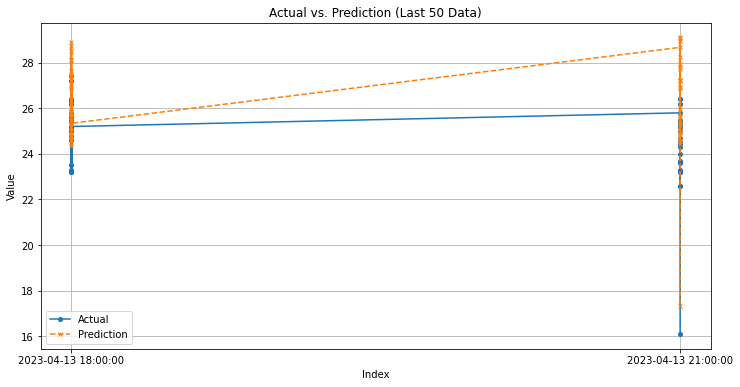

In [180]:
plt.figure(figsize=(12, 6))

plt.plot(combined_last_50.index, combined_last_50['actual'], label='Actual', marker='o', markersize=4)
plt.plot(combined_last_50.index, combined_last_50['prediction'], label='Prediction', linestyle='--', marker='x', markersize=4)

plt.title('Actual vs. Prediction (Last 50 Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()